In [ ]:
# Importing Packages
import math, sys
import numpy as np
import matplotlib.pyplot as plt
import time
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import random
from tqdm.notebook import tqdm

In [ ]:
#Compute the time-derivative of a Lorenz system
def x_dot(x1, y1, z1):
    x1_dot=sigma*(y1 - x1)
    return x1_dot

def y_dot(x1, y1, z1, y2, z2):
    y1_dot=rho*x1 - y1 - x1*z1
    y2_dot=rho*x1 - y2 - x1*z2
    return(y1_dot,y2_dot)

def z_dot(x1, y1, z1, y2, z2):
    z1_dot=-1*(beta*z1) + x1*y1
    z2_dot=-1*(beta*z2) + x1*y2
    return(z1_dot,z2_dot)

In [ ]:
# 4th order Runge Kutta (RK-4) numerical method
def RungeKutta4(a1,b1,c1,b2,c2,n):

    x1 = np.zeros(n)
    y1 = np.zeros(n)
    z1 = np.zeros(n)


    y2 = np.zeros(n)
    z2 = np.zeros(n)
    t = np.zeros(n)

    x1[0] = a1
    y1[0] = b1
    z1[0] = c1

    y2[0] = b2
    z2[0] = c2
    t[0] = 0
    dt = 0.01

    #Compute the approximate solution at equally spaced times.
    for k in range (n-1):

        t[k+1] = t[k] + dt

        k1 = x_dot(x1[k], y1[k], z1[k])
        l1,v1 = y_dot(x1[k], y1[k], z1[k], y2[k], z2[k])
        m1,w1 = z_dot(x1[k], y1[k], z1[k], y2[k], z2[k])

        k2 = x_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt))
        l2,v2 = y_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),
         (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt))
        m2,w2 = z_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),
         (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt))

        k3 = x_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt))
        l3,v3 = y_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt),
         (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt))
        m3,w3 = z_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt),
         (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt))

        k4 = x_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt))
        l4,v4 = y_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt), (y2[k] + v3*dt),
         (z2[k] + w3*dt))
        m4,w4 = z_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt), (y2[k] + v3*dt),
         (z2[k] + w3*dt))

        x1[k+1] = x1[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y1[k+1] = y1[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z1[k+1] = z1[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)

        y2[k+1] = y2[k] + (dt*(v1 + 2*v2 + 2*v3 + v4) / 6)
        z2[k+1] = z2[k] + (dt*(w1 + 2*w2 + 2*w3 + w4) / 6)

    return x1,y1,z1,y2,z2, t


In [ ]:
# Initial conditions and function call
sigma = 16
beta = 4
rho = 45.2
N=8000
x_1, y_1, z_1, y_2, z_2, t = RungeKutta4(-10.1,10.1,10.1,0.1,0.1,N)


<Figure size 650x650 with 0 Axes>

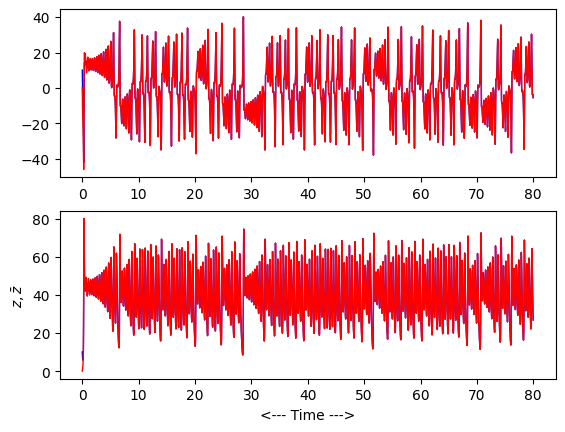

In [ ]:
#Plot
plt.figure (figsize = (6.5,6.5))
fig, axs = plt.subplots(2,1)

axs[0].plot ( t, y_1, linewidth = 1, color = 'b' )
axs[0].plot ( t, y_2, linewidth = 1, color = 'r' )
#plt.ylim(-30, 30)
plt.ylabel ( r'$y,\bar{y}$')


axs[1].plot ( t, z_1, linewidth = 1, color = 'b' )
axs[1].plot ( t, z_2, linewidth = 1, color = 'r' )
plt.xlabel ( '<--- Time --->' )
plt.ylabel ( r'$z,\bar{z}$')
#plt.ylim(0, 45)
plt.show ( )

In [ ]:
Y,Z=[],[]
for y1, y2 in zip(y_1, y_2):
    Y.append(abs(y1 - y2))
for z1, z2 in zip(z_1, z_2):
    Z.append(abs(z1 - z2))


Text(0.5, 0, 't')

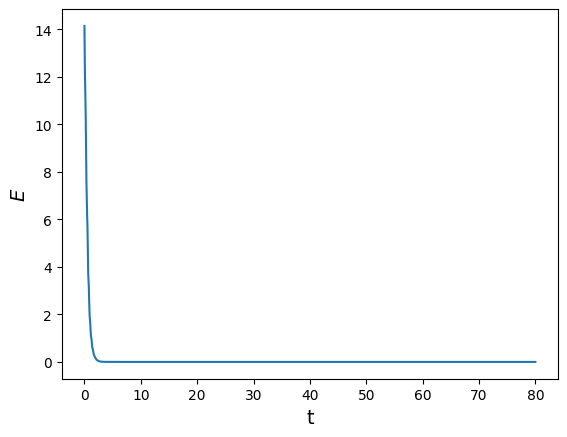

In [ ]:
#Sync Error vs Time
plt.plot(t,[math.sqrt(pow(y1-y2,2)+pow(z1 - z2,2)) for x1,y1,y2,z1, z2 in zip(x_1,y_1,y_2,z_1, z_2)])
plt.ylabel(r"$E$",fontsize=14)
plt.xlabel("t",fontsize=14)

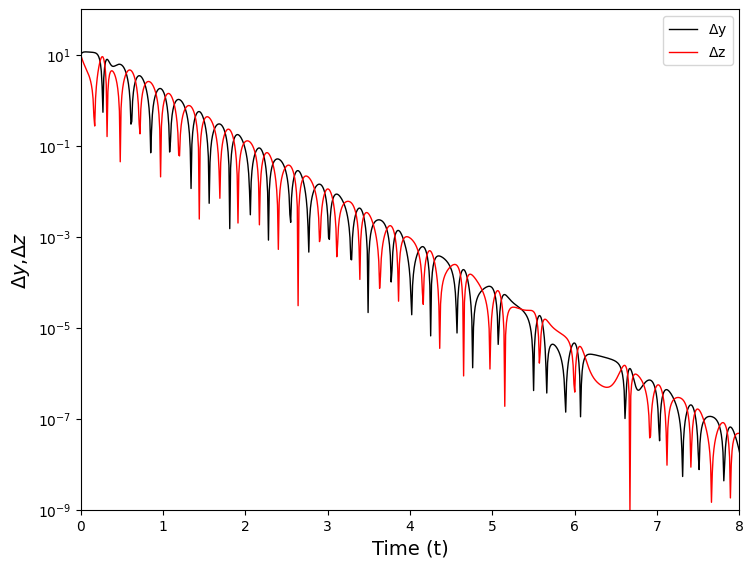

In [ ]:
#Plot
plt.figure (figsize = (8.5,6.5))
ax = plt.axes(yscale='log')
ax.plot( t,Y, linewidth = 1, color = 'black', label=r'$\Delta$y')
ax.plot( t,Z, linewidth = 1, color = 'red', label=r'$\Delta$z') #ax.semilog()
ax.set_ylim(pow(10,-9),pow(10,2))
ax.set_xlim(0,8)
ax.legend()
plt.ylabel(r"$\Delta y$,$\Delta z$",fontsize=14)
plt.xlabel("Time (t)",fontsize=14)
plt.savefig('RK4 Master Slave.pdf', format='pdf')
plt.show()